# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [19]:
# Loading data
df_loans = pd.read_csv("heart_statlog_cleveland_hungary_clean.csv")
df_loans.head()
cleaned_df = df_loans.drop_duplicates().reset_index(drop=True)
cleaned_df = cleaned_df.rename(columns={'chest pain type': 'chest_pain_type', 'resting bp s': 'resting_bp_s', 'fasting blood sugar': 'fasting_blood_sugar', 'resting ecg': 'resting_ecg', 'max heart rate': 'max_heart_rate', 'exercise angina': 'exercise_angina', 'ST slope': 'ST_slope'})
cleaned_df

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1


In [20]:
# Define features set
X = cleaned_df.copy()
X.drop("target", axis=1, inplace=True)
X.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


In [21]:
# Define target vector
y = cleaned_df["target"].ravel()
y[:5]

array([0, 1, 0, 1, 0])

In [22]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [23]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [24]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [25]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [26]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [27]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [28]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [29]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,84,20
Actual 1,17,109


Accuracy Score : 0.8391304347826087
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       104
           1       0.84      0.87      0.85       126

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



## Feature Importance

In [31]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2139165348280855, 'ST_slope'),
 (0.13316660845322512, 'chest_pain_type'),
 (0.11337689874060049, 'oldpeak'),
 (0.11074999220862665, 'max_heart_rate'),
 (0.10972215934412946, 'cholesterol'),
 (0.08876233879835335, 'exercise_angina'),
 (0.07359185116714667, 'resting_bp_s'),
 (0.07295220624634541, 'age'),
 (0.036231933045565275, 'sex'),
 (0.024129610849215128, 'resting_ecg'),
 (0.023399866318707038, 'fasting_blood_sugar')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

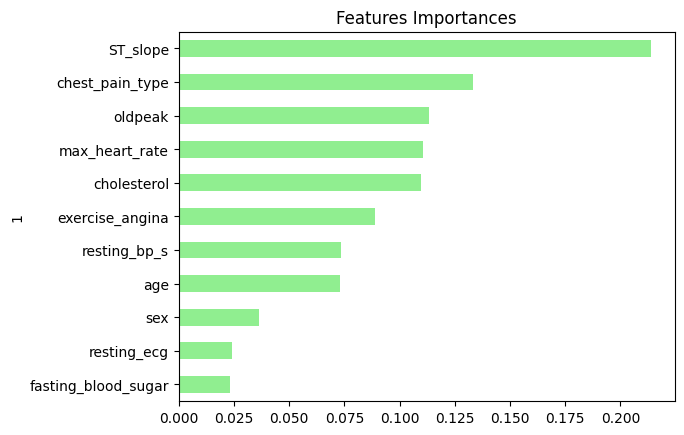

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)